# Estatística Básica
![img estatistica](https://databootcamp.nyc3.digitaloceanspaces.com/img/homer_simpson_as_pessoas_inventam_estatisticas_para_pro_l656rme.jpg)

### Precisamos conseguir entender nossos dados estatisticamente

Analisando os dados do Titanic, você consegue muitas informações estatísticas que ajudam a compreender melhor seu problema e resolver ele da melhor forma possível. Nosso problema pode ser resolvido com algoritmos de Machine Learning, mas também com algumas ferramentas simples de estatística que vamos ver aqui.


## Vamos precisar usar uma nova biblioteca científica do Python!

### SciPy
![scipy](https://databootcamp.nyc3.digitaloceanspaces.com/img/scipy.png)

### Processamento numérico e de matrizes

O Numpy é uma das principais principais bibliotecas do Python para computação científica. NumPy vem de _Numerical Python_ e é o pacote que permite que manipulemos matrizes e vetores de forma simples.

![numpy](https://databootcamp.nyc3.digitaloceanspaces.com/img/numpy.jpeg)



In [42]:
import numpy 

# Métricas 
Para entendermos como são nossos dados, precisamos entender as métricas deles!

In [5]:
import pandas
titanic = pandas.read_csv("https://databootcamp.nyc3.digitaloceanspaces.com/titanic_2.csv")

In [6]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Relatives,AgeRange,AgeNotNull,AgeFillNa-1,AgeFillNaSexMean
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,adulto,22.0,22.0,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,adulto,38.0,38.0,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,adulto,26.0,26.0,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,adulto,35.0,35.0,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,adulto,35.0,35.0,35.0


In [7]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Relatives,AgeNotNull,AgeFillNa-1,AgeFillNaSexMean
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.904602,29.699118,23.600640,29.736034
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,1.613459,14.526497,17.867496,13.014897
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.420000,-1.000000,0.420000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000,20.125000,6.000000,22.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000,28.000000,24.000000,30.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000,38.000000,35.000000,35.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,10.000000,80.000000,80.000000,80.000000


Essa visão é legal, mas nem tudo faz sentido...

Ids de passageiro, por exemplo. O que a média disso me diz?

**Não é porque podemos fazer algo que devemos fazê-lo**
![com grandes poderes vem grandes responsabilidades](https://i.pinimg.com/originals/d6/de/4f/d6de4f169843f3a587430e64b9354592.jpg)

## Média Artimética

É uma medida que tenta encontrar valores centrais de uma distribuição.

In [8]:
titanic.Age.mean()

29.69911764705882

### Vamos dar uma olhada mais a fundo pra gente revisar como as médias funcionam

É obtida somando todos os valores e dividindo pelo números de indivíduos da população. 

In [9]:
valores = [1,2,3,4,5]

def media(lista):
    return sum(lista) / len(lista)

media(valores)

3.0

**Ela é fortemente influenciada por valores extremos**

In [10]:
valores = [1,1,1,1,10000]

def media(lista):
    return sum(lista) / len(lista)

media(valores)

2000.8

## Quartil / Percentil

São medidas que dividem a amostra ordenada (por ordem crescente dos dados). O percentil é essa medida em 100 partes.

In [11]:
titanic.Age.describe()[["25%", "50%", "75%"]]

25%    20.125
50%    28.000
75%    38.000
Name: Age, dtype: float64

#### Para pegarmos o Primeiro Quartil ou percentil 25?

In [12]:
titanic.Age.quantile(0.25)

20.125

Um quantil, por outro lado, é uma medida que depende de quantas partes usamos da população. Alguns quantis tem nomes especiais, como o os quartis (4-quantis) ou percentis (100-quantis). Eles recebem esse nome porque representam em quantas partes a população foi dividida (em 4 ou 100 no exemplo aqui, respectivamente).

## <font color='blue'>Como pegamos o percentil 80?</font>
![alt text](https://databootcamp.nyc3.digitaloceanspaces.com/img/atrasada-relogio-pulso-1116-1400x800.jpg)

In [13]:
#solução
titanic.Age.quantile(0.80)

41.0

## O percentil 50 também é chamado de MEDIANA
Ele é muito usado para encontrar um valor central da sua distribuição.

In [14]:
titanic.Age.quantile(0.50)

28.0

In [15]:
titanic.Age.median()

28.0

### Vamos dar uma olhada mais a fundo pra gente revisar como as mediana funcionam

![alt text](https://databootcamp.nyc3.digitaloceanspaces.com/img/maxresdefault.jpg)

É o valor médio de uma distribuição ordenada, no qual apresenta o mesmo número de valores abaixo e acima desse valor.
Se a distribuição tiver números ímpares ele é um único valor, se a distribuição tiver números pares é a média dos 2 valores centrais.

A mediana separa a distribuição em duas partes iguais. Metade da distribuição possui valores acima da mediana e, a outra metade, abaixo.

In [16]:
impar = [1, 10, 20, 30, 1000]

In [17]:
numpy.median(impar)

20.0

**Não sofre impacto dos valores extremos como a média**

In [18]:
numpy.mean(impar)

212.2

## <font color='blue'>Qual a mediana da distribuição [1,10,20,30]?</font>

Como ela é uma distribuição par, o valor da mediana vai ser a média entre os dois elementos centrais (10,20)

![alt text](https://databootcamp.nyc3.digitaloceanspaces.com/img/atrasada-relogio-pulso-1116-1400x800.jpg)

In [29]:
#solução
mediana =  [1,10,20,30]

np.median(mediana)


15.0

## Vamos aplicar um pouco essas métricas com BoxPlot

É um dos gráficos favoritos para analisar uma distribuição. 
Ele pega os dados que apresentamos no describe e exibe de forma gráfica.


O boxplot é como um histograma "visto de cima". A caixinha central contém 50% de todos os pontos da distribuição. Ou seja, é onde se concentra boa parte dos valores da distribuição. Com esse desenho, é possível ter uma noção sobre a simetria do conjunto, bem como outros detalhes importantes. Tudo isso com um recurso visual!

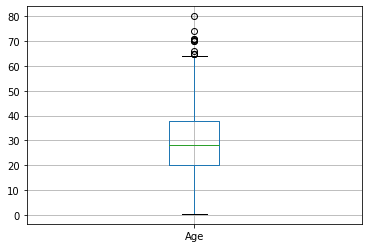

In [30]:
titanic.boxplot("Age")

### "O grande valor de uma imagem é quando ela nos obriga a notar o que nunca esperávamos ver." - Tukey

A interpretação do gráfico é:
- Exibe os percentis 25, 50, 75 em um retangulo que é chamado de IQR (Amplitude Interquartílica): Q3 - Q1
- A whisker inferior (limite inferior) é o percentil 25 (quartil 1) menos 1.5 multiplicado pelo IQR ($LI = Q1 - 1.5 * IQR)
- A whisker superior (limite superior) é o percentil 75 (quartil 3) mais 1.5 multiplicado pelo IQR ($LS = Q3 + 1.5 * IQR)
- Os pontos chamados de **outliers** (atípicos)

#### Vamos ver esses valores calculados para a coluna *Age* no Titanic

Aqui temos o IQR

In [33]:
titanic["Age"].min()

0.42

In [31]:
iqr = titanic.Age.quantile(0.75) - titanic.Age.quantile(0.25)
iqr

17.875

Tendo o IQR conseguimos extrair o limite superior e inferior

In [32]:
limite_superior = titanic.Age.quantile(0.75) + 1.5 * iqr
limite_superior

64.8125

In [34]:
limite_inferior = titanic.Age.quantile(0.25) - 1.5 * iqr
limite_inferior

-6.6875

![alt text](https://databootcamp.nyc3.digitaloceanspaces.com/img/Diagrama_de_caixa2.png)

É possível analisar 2 BoxPlots de forma comparativa agrupando por uma coluna.

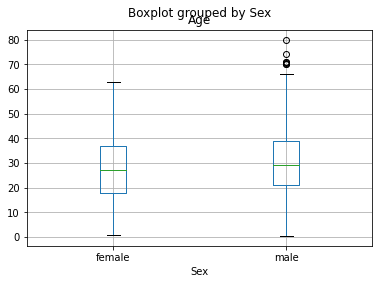

In [35]:
titanic.boxplot("Age", by="Sex")

Essa visão é muito útil para ter alguma previsão sobre a resposta para alguns tipos de perguntas sobre os dados. Por exemplo, olhando assim, parece que temos alguma diferença entre a distribuição de idade por gênero?

O que eu precisaria enxergar aqui para mudar de opinião?

## <font color='blue'>Crie um BoxPlot com a coluna preenchida *AgeFillNaSexMean*</font>
![alt text](https://databootcamp.nyc3.digitaloceanspaces.com/img/atrasada-relogio-pulso-1116-1400x800.jpg)

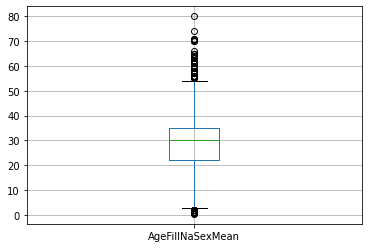

In [36]:
#solução

titanic.boxplot("AgeFillNaSexMean")


## Moda

É o valor da distribuição que ocorre com a maior frequência, ou seja, o valor que mais se repete dentro de uma série de observações. 

![alt text](https://databootcamp.nyc3.digitaloceanspaces.com/img/histogram.png)

In [37]:
#a moda retorna uma lista pois podemos ter mais um de um elemento no top
titanic.Age.mode() 

0    24.0
dtype: float64

#### Para pegarmos uma moda só podemos pegar a primeira

In [38]:
titanic.Age.mode()[0]

24.0

In [39]:
titanic.Age.value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

## Variância
É uma medida de dispersão quadratica que mostra o quão distante cada valor desse conjunto está do valor central.

O cálculo da variância populacional é obtido através da soma dos quadrados da diferença entre cada valor e a média aritmética, dividida pela quantidade de elementos observados. 

![alt text](https://databootcamp.nyc3.digitaloceanspaces.com/img/aid867321-v4-728px-Calculate-Variance-Step-10.jpg)

### Vamos pensar no número de horas trabalhadas em uma empresa

Como sabemos quão disperso é o número de horas trabalhadas pelos nossos funcionários? Será que todos estão trabalhando um número de horas parecida em cada dia?

![alt text](https://databootcamp.nyc3.digitaloceanspaces.com/img/6y9Vnsw.png)

Vimos que a variância de horas do funcionário **A** durante a semana é 2.

### Como podemos tirar do GREGO e colocar em código?

Com o Numpy e com o Pandas já temos isso implementado.

In [40]:
numpy.var([10,9,11,12,8])

2.0

In [41]:
titanic.Age.var()

211.0191247463081

In [43]:
titanic['AgeFillNaSexMean'].var()

169.38754078094604

## <font color='blue'>Qual a variância de horas trabalhadas entre os funcionários por semana?</font>
Vimos a variância de horas na semana, mas e entre os funcionários? Existem pessoas trabalhando mais que as outras na semana?
![alt text](https://databootcamp.nyc3.digitaloceanspaces.com/img/atrasada-relogio-pulso-1116-1400x800.jpg)

In [47]:
#solução
# Como eu fiz
((50 - 10)**2 + (64 -12.8) **2 + (52 - 10.4) **2 + (55 - 11) ** 2) / 4  #errado

# Como o prof fez
media_horas = ([10, 12.8, 10.4, 11])
np.var(media_horas)

1.1475000000000006

### Cuidado! A variância é muito afetada por valores extremos

In [48]:
lista_de_exemplo = [1, 100, 50]
numpy.var(lista_de_exemplo)

1633.5555555555554

## Desvio Padrão - stddev

Vimos que a variância é muito afetada por valores extremos. Para evitar isso, usamos o desvio padrão.

**desvio_padrao = √variancia**


Com o desvio padrão você é capaz de identificar o “erro” que podemos ter ao substituir um dos valores coletados pela média aritmética. Inclusive como já fizemos aqui!

No caso, vocês substituíram o valor de idade pela média. Podemos validar se isso é confiável!

In [49]:
titanic.Age.std()

14.526497332334044

In [50]:
titanic["Age"].var()

211.0191247463081

In [51]:
211.0191247463081 ** 0.5

14.526497332334044

Temos uma chance de erro aparentemente grande. **Uma variação de 14,52 na idade é muita coisa!**

Podemos ver a utilização do desvio padrão na apresentação da média aritmética, informando o quão “confiável” é esse valor.

**média aritmética (x) ± desvio padrão (dp)**

In [52]:
titanic.Age.mean()

29.69911764705882

Aqui teríamos 29,69 ± 14,52... Ou seja, substiuindo a média das idades por idades faltantes temos a chance de colocar a idade de 29 anos para quem tem mais de 40 anos ou para um adolescente de 15 anos!

In [53]:
titanic.Age.mean() - titanic.Age.std()

15.172620314724776

In [54]:
titanic.Age.mean() + titanic.Age.std()

44.225614979392866

## <font color='blue'>Mas e quando separamos por gênero? Será que diminui o erro?</font>
![alt text](https://databootcamp.nyc3.digitaloceanspaces.com/img/atrasada-relogio-pulso-1116-1400x800.jpg)

In [55]:
#solução

titanic.Age[titanic.Sex == "male"].std()

14.678200823816601

In [56]:
titanic.Age[titanic.Sex == "female"].std()

14.110146457544134

In [69]:
titanic.groupby("Sex").Age.std()


Sex
female    14.110146
male      14.678201
Name: Age, dtype: float64